In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [8]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,data_source='yahoo',start=start,end=end)

In [10]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.225311
2020-09-29,115.309998,113.570000,114.550003,114.089996,99382200.0,113.360878
2020-09-30,117.260002,113.620003,113.790001,115.809998,142675200.0,115.069893
2020-10-01,117.720001,115.830002,117.639999,116.790001,116120400.0,116.043625
2020-10-02,115.370003,112.220001,112.889999,113.019997,144712000.0,112.297722


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-09-28 to 2021-09-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

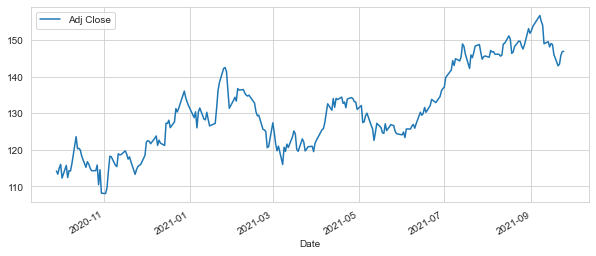

In [12]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

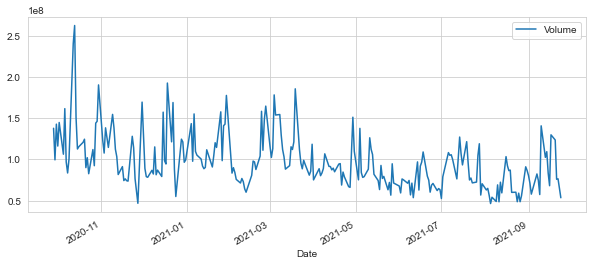

In [13]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [19]:
# Moving Averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

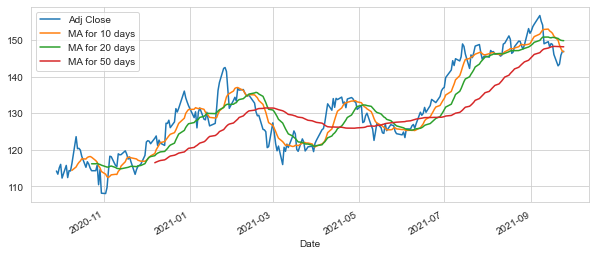

In [20]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

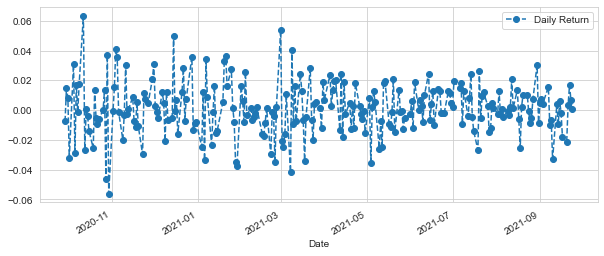

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

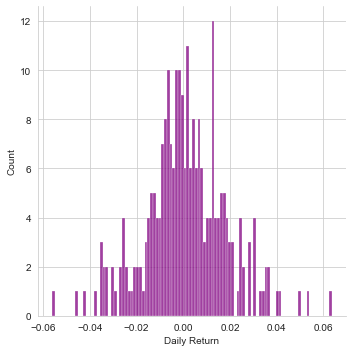

In [26]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

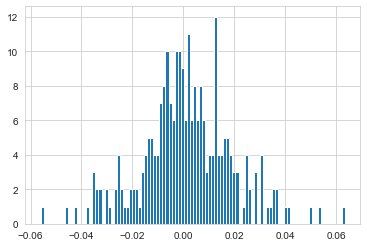

In [27]:
AAPL['Daily Return'].hist(bins=100)

In [28]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [ ]:
closing_df.head()

In [29]:
tech_rets = closing_df.pct_change()

In [30]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-09-28,NaN,NaN,NaN,NaN
2020-09-29,-0.007568,0.003284,-0.010409,-0.009190
2020-09-30,0.015076,0.000184,0.014812,0.001224
2020-10-01,0.008462,0.013943,0.010127,0.023035
2020-10-02,-0.032280,-0.021254,-0.029511,-0.029883


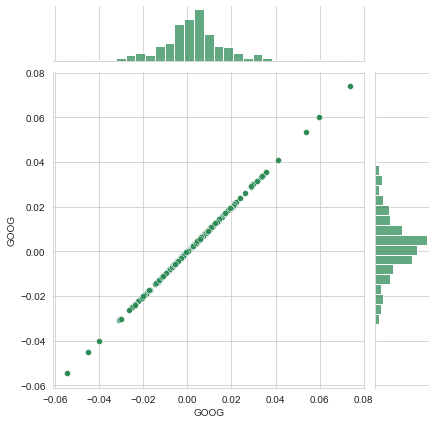

In [32]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

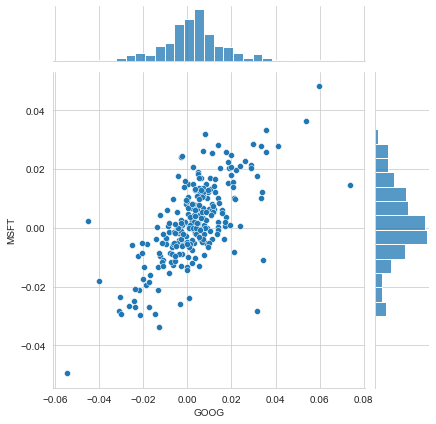

In [33]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

In [ ]:
url = 'https://en.wikipedia.org/wiki/Pearson_correlation_coefficient'

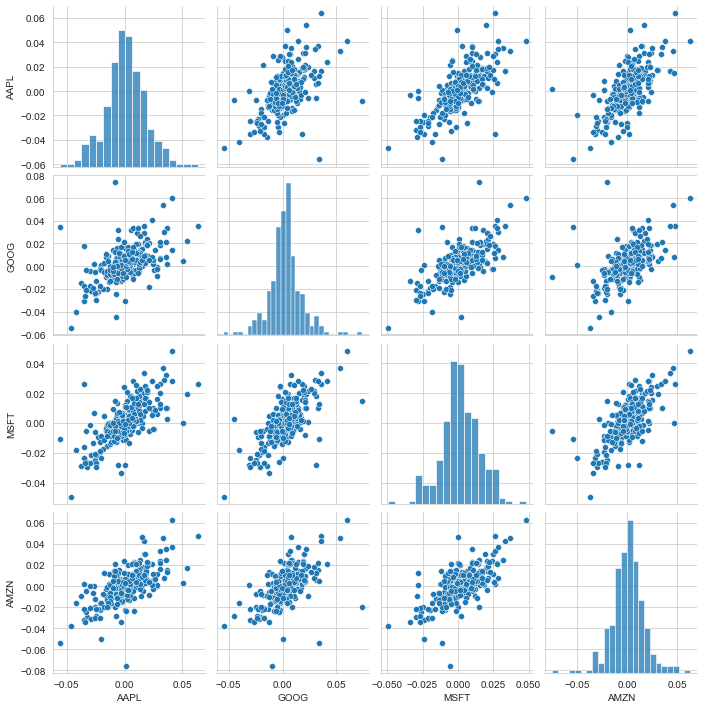

In [34]:
sns.pairplot(tech_rets.dropna())

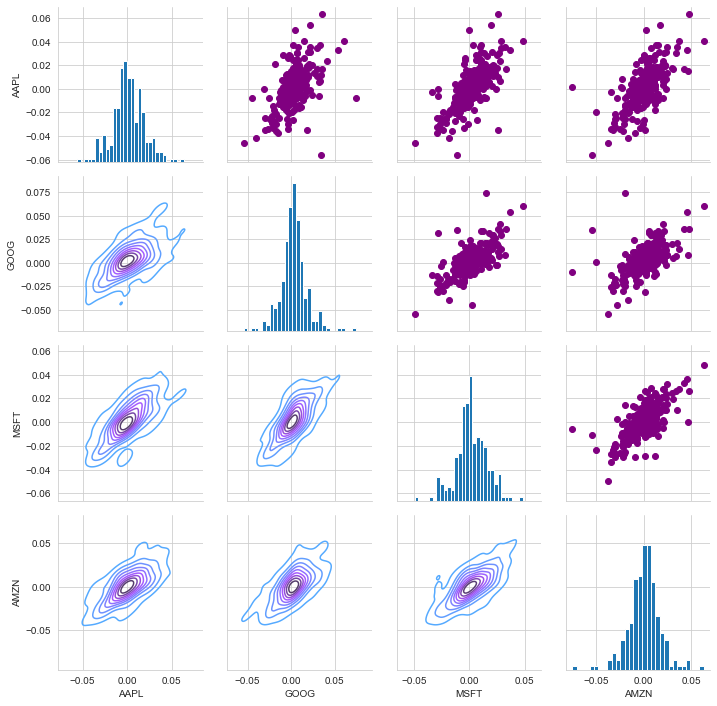

In [37]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

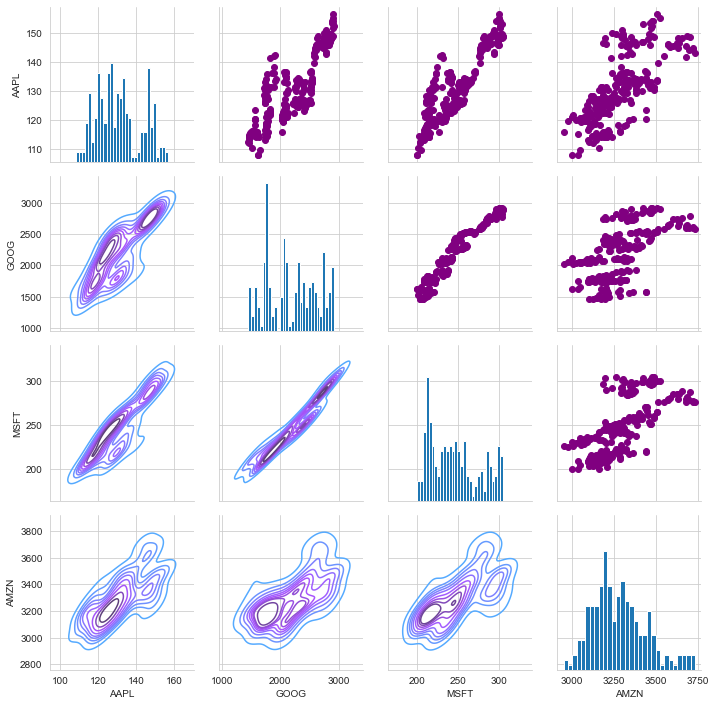

In [38]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

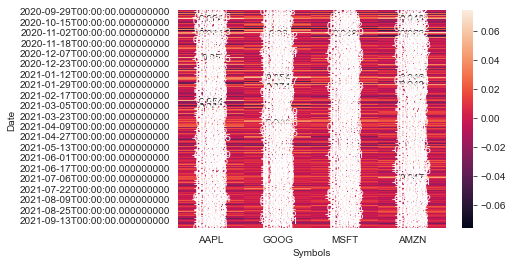

In [44]:
sns.heatmap(tech_rets.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

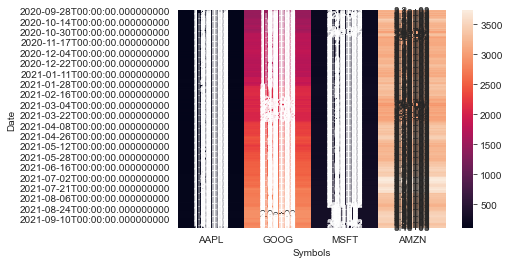

In [45]:
sns.heatmap(closing_df,annot=True)